<a href="https://colab.research.google.com/github/themathedges/3YP-Standalone-Kennington/blob/main/Ravi/RAVI_Python_MT4_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LEO 3YP - Intro to Python - Ravi Kohli
## 3YP MT2 - 02.11.2020


To launch jupyter-notebook:

In Navigator:
1.   Select the Home tab
2.   Select the correct environment from the dropdown list
3.   Click 'Launch' on the Jupyter Notebook app

Command line:
1.   Activate the correct environment
```
$ conda activate LEO3YP2020
```
2.   Launch jupyter-notebook
```
$ jupyter-notebook
```

### A note on style...

Try to follow the accepted standard for python code style. This is documented in [PEP 8](https://www.python.org/dev/peps/pep-0008/).

Docstrings and comments are particularly important for collaborating on code. It ensures others know what your code does, and why you needed to do it in that way. It will also form the basis of any documentation. Start this from day 1.

## Getting started with NumPy and Pandas


### First let's import the needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

&nbsp;

## Let's work with Pandas Dataframes

&nbsp;

<div style="background-color:rgba(0, 0, 0, 0); text-align:left; vertical-align: middle; padding:70px 100px 100px 500px;">
The first step will involve you creating a hypothetical dataframe and then you will move on to importing energy data with Pandas to perform basic descriptive statistics.
</div>


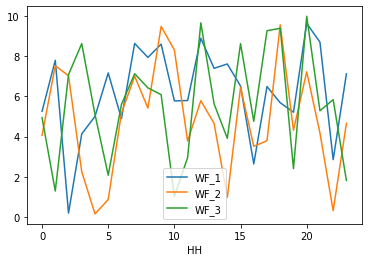

In [2]:
# Any guess what this is for?
%matplotlib inline 

# Use NumPy to create a random array of wind farm data for three 10 MW wind farms
# What is happening here?
wf_data = np.random.rand(24,3)*10

# Use Pandas to create a dataframe to store the data, naming the columns
wf_df = pd.DataFrame(wf_data, columns=['WF_1','WF_2','WF_3'])
wf_df.index.name = 'HH'
wf_df.head()

# And with one line, you can have a basic plot in Pandas
wf_df.plot()

### There are a few ways of importing data into Python and Pandas makes it very convenient.  
  
Have a look at the code below to see two examples  
  
`import pandas as pd
df = pd.read_csv('filename.txt', sep=" ", header=None, names=["a","b","c"])`
  
Or  
  
`import pandas as pd 
df = pd.read_csv('file_location\filename.txt', delimiter = "\t")  # Can input a URL as well`



#### Let's go ahead and import some data

The code below will use a URL to import data on the power plants of the USA, using the simpliest form of input arguements to the Pandas `read_csv` function. Note how we imported Numpy as `np` and not Pandas as `pd`. Dataframes are conventionally called `df` in Python but you can rename to another logical variable name. 


In [3]:
# The following implies an internet connection of course

df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_USA.csv')

#### Let's have a look at the data

The `head` function is an easy way to inspect your dataset. The default number of rows to show is 5. Let's explore the dataset a bit. Use `df.head(20)` to see more rows etc. 
  
  

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,USA,United States of America,12 Applegate Solar LLC,USA0059371,1.9,40.2003,-74.5761,Solar,NaN,NaN,NaN,2012.0,SunRay Power LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2017.0,2.41461,2.350,2.430,2.492,2.276,U.S. Energy Information Administration,NaN
1,USA,United States of America,126 Grove Solar LLC,USA0060858,2.0,42.0761,-71.4227,Solar,NaN,NaN,NaN,2012.0,126 Grove Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2017.0,NaN,NaN,NaN,2.416,2.251,U.S. Energy Information Administration,NaN
2,USA,United States of America,1420 Coil Av #C,USA0057310,1.3,33.7943,-118.2414,Solar,NaN,NaN,NaN,2011.0,Konoike Pacific,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2017.0,1.52800,2.149,1.515,1.592,1.660,U.S. Energy Information Administration,NaN
3,USA,United States of America,145 Talmadge Solar,USA0057458,3.8,40.5358,-74.3913,Solar,NaN,NaN,NaN,2011.0,Avidan Energy Solutions,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2017.0,5.03600,4.524,4.802,5.051,4.819,U.S. Energy Information Administration,NaN
4,USA,United States of America,1515 S Caron Road,USA0007770,4.2,41.9084,-89.0466,Gas,NaN,NaN,NaN,2000.0,Rochelle Municipal Utilities,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,2017.0,0.21500,0.178,0.271,0.306,0.264,U.S. Energy Information Administration,NaN


Your turn. Let's pull some data from the `df` that we have loaded based on some of the information given to you through the graphic above. *Hint: It is best to only use the data that you need.
&nbsp;

**Use the cells below to print the following values:**

1. The total number of power plants in the US.
2. The minimum, maximum and average capacity of the plants in MW.
3. The number of listed solar farms.
4. The number of different plant types listed.
5. The year with the highest generation from all of the plants.


We won't be giving answers to these!*


In [5]:
# getting some summary info from the dataframe by using
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   10173 non-null  object 
 1   country_long              10173 non-null  object 
 2   name                      10173 non-null  object 
 3   gppd_idnr                 10173 non-null  object 
 4   capacity_mw               10173 non-null  float64
 5   latitude                  10141 non-null  float64
 6   longitude                 10141 non-null  float64
 7   primary_fuel              8698 non-null   object 
 8   other_fuel1               1447 non-null   object 
 9   other_fuel2               296 non-null    object 
 10  other_fuel3               104 non-null    object 
 11  commissioning_year        8677 non-null   float64
 12  owner                     10160 non-null  object 
 13  source                    10173 non-null  object 
 14  url   

In [6]:
# The total number of power plants in the US.
df['name'].nunique()            # assuming each plant has unique name with NaN's excluded
df['name'].count()              # returns a general count with NaN's excluded

10173

In [7]:
# The minimum, maximum and average capacity of the plants in MW.
df_capacity_copy = df
df_capacity_copy.dropna(subset = ['capacity_mw'], inplace=True)
df_capacity_copy['capacity_mw'].describe()

count    10173.000000
mean       117.337083
std        344.368767
min          0.000000
25%          1.800000
50%          6.100000
75%         54.000000
max       6809.000000
Name: capacity_mw, dtype: float64

In [8]:
min_capacity = df_capacity_copy['capacity_mw'].min(axis=0)                # minimum capacity
max_capacity = df_capacity_copy['capacity_mw'].max(axis=0)                # maximum capacity
average_capacity = df_capacity_copy['capacity_mw'].mean(axis=0)           # average capacity

print('Min: {} MW, Max: {} MW, and Average: {} MW'.format(min_capacity, max_capacity, average_capacity))

Min: 0.0 MW, Max: 6809.0 MW, and Average: 117.33708345620755 MW


In [9]:
# The number of listed solar farms.
df[df['primary_fuel']=='Solar']['name'].count()          

2292

In [10]:
# The number of different plant types listed.
df['primary_fuel'].nunique()                            # counting the number of unique, non-Nan values in the column

14

In [11]:
# The year with the highest generation from all of the plants.
df_highest_generation = df[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016']]
a = df_highest_generation.max(axis=1, skipna = True)           # we are calling the max function on each row and skipping NaN values
a

0         2.492
1         2.416
2         2.149
3         5.051
4         0.306
          ...  
10168     1.058
10169     3.671
10170       NaN
10171     0.000
10172    76.392
Length: 10173, dtype: float64

In [12]:
# now we are trying to remove the row with any NaN's
df_highest_generation.dropna(axis=0, inplace = True)
df_highest_generation.tail()
b = df_highest_generation.max(axis=1, skipna = True) 
b

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0          2.492000
2          2.149000
3          5.051000
4          0.306000
7          2.741000
            ...    
10166    435.493999
10167     49.134000
10168      1.058000
10169      3.671000
10172     76.392000
Length: 6350, dtype: float64

# Homework

Using the data available [here](https://bitbucket.org/scotwheeler/leo_3yp_2020/raw/1977824169f7551bccaf3bd1d7f734728e1a69e3/data/example_PV_data.csv), plot the following?

- daily energy over the period of a year
- daily maximum half-hourly power over June and December
- average half-hourly profile for an August day with interquartile range

Don't forget a legend, axis labels, units and any conversions.

- What is the total solar energy generated over the year?
- Is there any missing data? How might you deal with this?
- Estimate the capacity of the installation if it is in Oxford (hint: what is the capacity factor for PV in the UK).

In [13]:
# a starting point...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# normal version
df2 = pd.read_csv("https://bitbucket.org/scotwheeler/leo_3yp_2020/raw/1977824169f7551bccaf3bd1d7f734728e1a69e3/data/example_PV_data.csv",
                 index_col=0, parse_dates=True, dayfirst=True)

# split up version
df = pd.read_csv("https://bitbucket.org/scotwheeler/leo_3yp_2020/raw/1977824169f7551bccaf3bd1d7f734728e1a69e3/data/example_PV_data.csv",parse_dates=True, dayfirst=True)


df.head()

,Datetime,Energy (kWh)
0,2019-01-01 00:30:00,0.0
1,2019-01-01 01:00:00,0.0
2,2019-01-01 01:30:00,0.0
3,2019-01-01 02:00:00,0.0
4,2019-01-01 02:30:00,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      17520 non-null  object 
 1   Energy (kWh)  16080 non-null  float64
dtypes: float64(1), object(1)
memory usage: 273.9+ KB


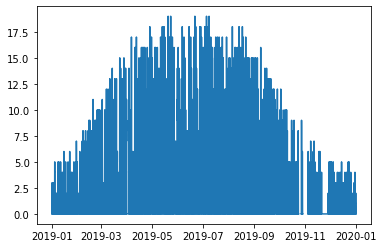

In [15]:
plt.plot(df2)
#plt.plot(df['Datetime'], df['Energy (kWh)'])                  # just an initial plot

## Q1: Plot the daily energy over the period of a year

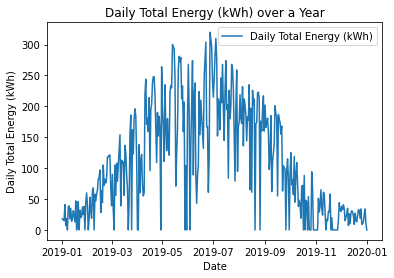

In [16]:
# CODE FOR QUESTION 1
q1_df = df2                       # create a copy
q1 = q1_df.resample('D').sum()    # grouping the data by days and summing it

# now we need to plot the data
plt.plot(q1)
plt.title('Daily Total Energy (kWh) over a Year')
plt.xlabel('Date')
plt.ylabel('Daily Total Energy (kWh)')
plt.legend(['Daily Total Energy (kWh)'])
plt.show()

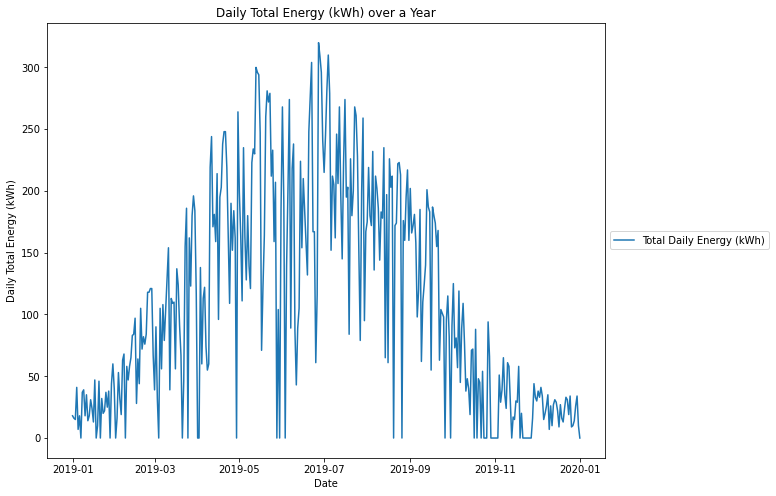

In [17]:
# plotting the data again using other aspects of matplotlib
fig_1 = plt.figure(figsize= (10, 8))
ax_1 = plt.subplot(111)

ax_1.plot(q1, label='Total Daily Energy (kWh)')

# Shrink current axis by 20%
box_1 = ax_1.get_position()
ax_1.set_position([box_1.x0, box_1.y0, box_1.width, box_1.height])

# Put a legend to the right of the current axis
ax_1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Daily Total Energy (kWh) over a Year')
plt.xlabel('Date')
plt.ylabel('Daily Total Energy (kWh)')

plt.show()

## Q2: Plot the daily maximum half-hourly power over June and December

In [18]:
q2 = df                   # creating a copy of the data

# we need to convert the energy into power; power = energy / time
t_hr = 60 * 60            # seconds in an hour

q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      17520 non-null  object 
 1   Energy (kWh)  16080 non-null  float64
dtypes: float64(1), object(1)
memory usage: 273.9+ KB


In [19]:
# need to convert the data to datetime
q2['Datetime'] = pd.to_datetime(q2['Datetime'])

In [20]:
# unit conversion from kWh to kW
q2['Energy (kWh)'] /= t_hr
q2.head(10)

,Datetime,Energy (kWh)
0,2019-01-01 00:30:00,0.0
1,2019-01-01 01:00:00,0.0
2,2019-01-01 01:30:00,0.0
3,2019-01-01 02:00:00,0.0
4,2019-01-01 02:30:00,0.0
5,2019-01-01 03:00:00,0.0
6,2019-01-01 03:30:00,0.0
7,2019-01-01 04:00:00,0.0
8,2019-01-01 04:30:00,0.0
9,2019-01-01 05:00:00,0.0


In [21]:
# Extract the June data
june = q2[q2['Datetime'].dt.month == 6]
june

,Datetime,Energy (kWh)
7247,2019-06-01 00:00:00,0.0
7248,2019-06-01 00:30:00,0.0
7249,2019-06-01 01:00:00,0.0
7250,2019-06-01 01:30:00,0.0
7251,2019-06-01 02:00:00,0.0
...,...,...
8682,2019-06-30 21:30:00,0.0
8683,2019-06-30 22:00:00,0.0
8684,2019-06-30 22:30:00,0.0
8685,2019-06-30 23:00:00,0.0


In [22]:
june_day_max = june.resample('D',on='Datetime').max()  # extracting the maximum half-hourly energy per day
#june_day_max     # this is to view the data set

In [23]:
# Extract the December data
december = q2[q2['Datetime'].dt.month == 12]
#december             # this is to view the data set

In [24]:
# Note to self: we are resampling 'on' Datetime so we don't have to worry about the index column
dec_day_max = december.resample('D', on='Datetime').max()  # extracting the maximum half-hourly energy per day
#dec_day_max              # this is to view the data set

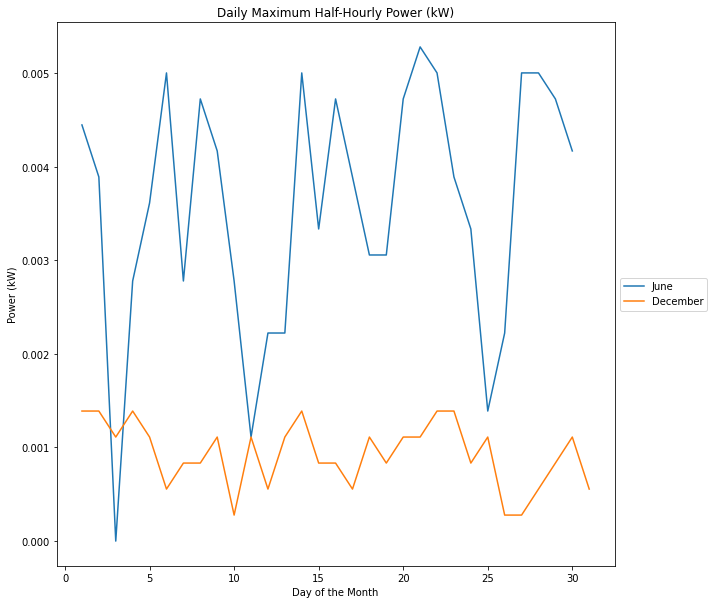

In [25]:
# now we want to plot the data
fig_2 = plt.figure(figsize=(10,10))
ax_2 = plt.subplot(111)

# we are extracting the day (e.g. 1st, 12th, etc.) from the datetime column so we can overlay the plots
ax_2.plot(june_day_max['Datetime'].dt.day, june_day_max['Energy (kWh)'], label='June')              # June data
ax_2.plot(dec_day_max['Datetime'].dt.day, dec_day_max['Energy (kWh)'], label='December')            # December data

# Shrink current axis by 20%
box_2 = ax_2.get_position()
ax_2.set_position([box_1.x0, box_1.y0, box_1.width, box_1.height])

# Put a legend to the right of the current axis
ax_2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Daily Maximum Half-Hourly Power (kW)')      
plt.xlabel('Day of the Month')
plt.ylabel('Power (kW)')

plt.show()

## Q3 : average half-hourly profile for an August day with interquartile range

In [26]:
q3 = df                  # create a copy of the data
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datetime      17520 non-null  datetime64[ns]
 1   Energy (kWh)  16080 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 273.9 KB


In [27]:
q3['Datetime'] = pd.to_datetime(q3['Datetime'])   # convert the data to datetime
q3

,Datetime,Energy (kWh)
0,2019-01-01 00:30:00,0.0
1,2019-01-01 01:00:00,0.0
2,2019-01-01 01:30:00,0.0
3,2019-01-01 02:00:00,0.0
4,2019-01-01 02:30:00,0.0
...,...,...
17515,2019-12-31 22:00:00,0.0
17516,2019-12-31 22:30:00,0.0
17517,2019-12-31 23:00:00,0.0
17518,2019-12-31 23:30:00,0.0


In [28]:
# Extract the August data
august = q3[q3['Datetime'].dt.month == 8]
august        # this is just to view the data frame

,Datetime,Energy (kWh)
10175,2019-08-01 00:00:00,0.0
10176,2019-08-01 00:30:00,0.0
10177,2019-08-01 01:00:00,0.0
10178,2019-08-01 01:30:00,0.0
10179,2019-08-01 02:00:00,0.0
...,...,...
11658,2019-08-31 21:30:00,0.0
11659,2019-08-31 22:00:00,0.0
11660,2019-08-31 22:30:00,0.0
11661,2019-08-31 23:00:00,0.0


In [29]:
august['Time'] = august['Datetime'].dt.time       # create a separate column with the Time components
august                                            # this is just to view the dataframe

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Datetime,Energy (kWh),Time
10175,2019-08-01 00:00:00,0.0,00:00:00
10176,2019-08-01 00:30:00,0.0,00:30:00
10177,2019-08-01 01:00:00,0.0,01:00:00
10178,2019-08-01 01:30:00,0.0,01:30:00
10179,2019-08-01 02:00:00,0.0,02:00:00
...,...,...,...
11658,2019-08-31 21:30:00,0.0,21:30:00
11659,2019-08-31 22:00:00,0.0,22:00:00
11660,2019-08-31 22:30:00,0.0,22:30:00
11661,2019-08-31 23:00:00,0.0,23:00:00


In [30]:
august_half_hourly = august.groupby(['Time']).mean()    # group and average the data
august_half_hourly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 00:00:00 to 23:30:00
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Energy (kWh)  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0+ bytes


In [31]:
august_half_hourly

,Energy (kWh)
Time,
00:00:00,0.000000
00:30:00,0.000000
01:00:00,0.000000
01:30:00,0.000000
02:00:00,0.000000
02:30:00,0.000000
03:00:00,0.000000
03:30:00,0.000000
04:00:00,0.000000


In [32]:
import matplotlib
import datetime

my_day = datetime.date(2019, 8, 15)           # creating a day within matplotlib to combine with the time
x_dt = [datetime.datetime.combine(my_day, t) for t in august_half_hourly.index]     # values for the x-axis

In [33]:
august_half_hourly.describe()

,Energy (kWh)
count,48.000000
mean,0.001064
std,0.001209
min,0.000000
25%,0.000000
50%,0.000465
75%,0.002354
max,0.003247


In [34]:
# calculating the lower and upper quartiles
import scipy.stats as sc

upper_q = np.quantile(august_half_hourly, .75)
lower_q = np.quantile(august_half_hourly, 0.25)

iqr = sc.iqr(august_half_hourly[august_half_hourly.values > 0])

print(upper_q)

0.0023539272030651337


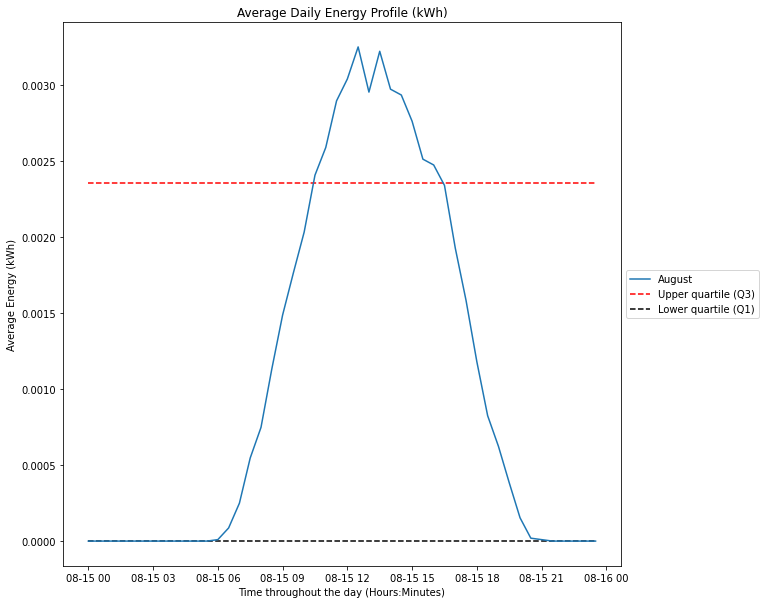

In [35]:
# now we want to plot the data

fig_3 = plt.figure(figsize=(10,10))
ax_3 = plt.subplot(111)

# plotting the average energy profile data for august
ax_3.plot(x_dt, august_half_hourly.values, label='August')             # June data
ax_3.hlines(upper_q, x_dt[0], x_dt[-1], label='Upper quartile (Q3)', colors='r', linestyles='dashed')
ax_3.hlines(lower_q, x_dt[0], x_dt[-1], label='Lower quartile (Q1)', color='k', linestyles='dashed')

# Shrink current axis by 20%
box_3 = ax_1.get_position()
ax_3.set_position([box_1.x0, box_1.y0, box_1.width, box_1.height])

# Put a legend to the right of the current axis
ax_3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average Daily Energy Profile (kWh)')      
plt.xlabel('Time throughout the day (Hours:Minutes)')
plt.ylabel('Average Energy (kWh)')

plt.show()

Need to fix the axes to display the time

In [36]:
august_half_hourly.index

Index([00:00:00, 00:30:00, 01:00:00, 01:30:00, 02:00:00, 02:30:00, 03:00:00,
       03:30:00, 04:00:00, 04:30:00, 05:00:00, 05:30:00, 06:00:00, 06:30:00,
       07:00:00, 07:30:00, 08:00:00, 08:30:00, 09:00:00, 09:30:00, 10:00:00,
       10:30:00, 11:00:00, 11:30:00, 12:00:00, 12:30:00, 13:00:00, 13:30:00,
       14:00:00, 14:30:00, 15:00:00, 15:30:00, 16:00:00, 16:30:00, 17:00:00,
       17:30:00, 18:00:00, 18:30:00, 19:00:00, 19:30:00, 20:00:00, 20:30:00,
       21:00:00, 21:30:00, 22:00:00, 22:30:00, 23:00:00, 23:30:00],
      dtype='object', name='Time')

## Q4: What is the total solar energy generated over the year?

In [37]:
q4 = df
q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datetime      17520 non-null  datetime64[ns]
 1   Energy (kWh)  16080 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 273.9 KB


Here we are using the fact that:

$$ \bar{x} = \frac{\Sigma_{i = 1}^N x_i}{N} $$

and re-arranging for the numerator of the fraction (i.e. the sum)

In [38]:
q4.describe()
q4_mean = q4['Energy (kWh)'].mean()
q4_count = q4['Energy (kWh)'].count()
q4_total = q4_mean * q4_count

print('The total solar energy generated is', q4_total, 'kWh')

The total solar energy generated is 11.125277777777345 kWh


## Q5: Is there any missing data? How might you deal with this?

There was missing data as there are fewer non-NaN values in the 'Energy (kWh)' column than in the 'Time' column according to the `df.info()` line

Different ways of dealing with this:
- Ignore the rows with NaN entries
- Replacement via similar average: we could use similar times from similar dates to calculuate an average and replace the NaN with that average
- Replacement via localised average: could replace the data with a calculated average of the data points around it (in a temporal sense)
- Nonlinear interpolation between the surrounding values

For the above calculation, I just chose to ignore those values, thereby calculating a lower bound estimate of the annual solar energy production

## Q6: Estimate the capacity of the installation if it is in Oxford (hint: what is the capacity factor for PV in the UK)

According to Google and Wikipedia, the PV capacity factor is about 10%

$$ Capacity Factor = \frac{p_{actual}}{p_{maximum}} $$

In [39]:
capacity_factor = 0.1
p_actual = q4_total

In [40]:
p_maximum = p_actual / capacity_factor
print(p_maximum, 'kWh')

111.25277777777345 kWh
